In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'C:\Users\Administrator\Downloads\1.04. Real-life example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [17]:
df.Year.unique()

array([1991, 1999, 2003, 2007, 2011, 2016, 1997, 2006, 2012, 1994, 2008,
       2001, 2013, 1998, 2010, 1989, 2009, 1996, 2014, 2000, 2004, 1987,
       1990, 2005, 1995, 2002, 2015, 1992, 1988, 1986, 1980, 1979, 1985,
       1993, 1969, 1984, 1978, 1983, 1982], dtype=int64)

In [18]:
df.Model.value_counts

<bound method IndexOpsMixin.value_counts of 0                     320
1            Sprinter 212
2                   S 500
3                      Q7
4                   Rav 4
              ...        
4340                S 350
4341                  535
4342                  520
4343              Corolla
4344    T5 (Transporter) 
Name: Model, Length: 4345, dtype: object>

In [19]:
df.drop('Model',axis=1,inplace=True)
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [20]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [24]:
df.shape

(4025, 8)

<AxesSubplot:xlabel='Price'>

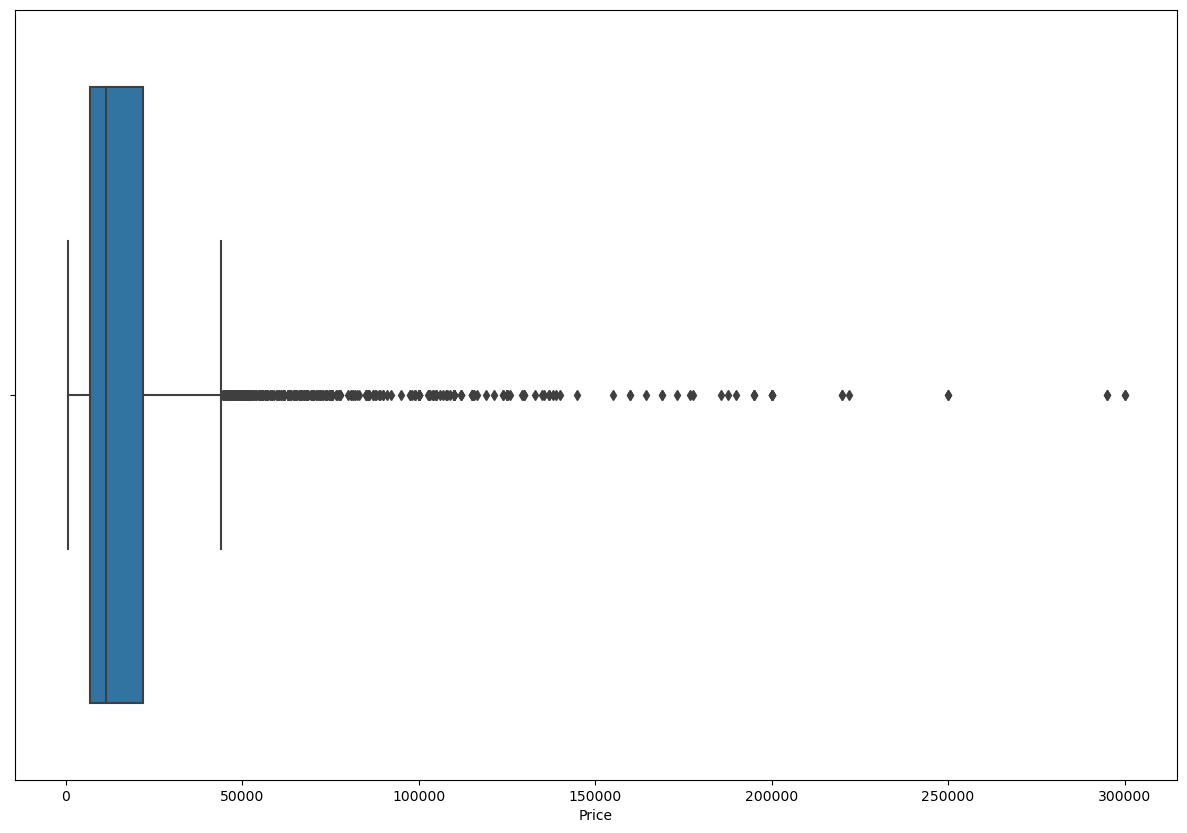

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df.Price)

In [26]:
df['Price'].describe()

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

In [27]:
Price_q1 = df.Price.quantile(.25)
Price_q1

6999.0

In [28]:
Price_q3 = df.Price.quantile(.75)
Price_q3

21900.0

In [29]:
Price_iqr = Price_q3 - Price_q1
Price_iqr

14901.0

In [30]:
price_lower_limit = Price_q1 - 1.5*Price_iqr
price_upper_limit = Price_q3 + 1.5*Price_iqr
price_lower_limit, price_upper_limit

(-15352.5, 44251.5)

In [31]:
df.Price.min()

600.0

In [32]:
new_df = df[(df.Price>price_lower_limit) & (df.Price<price_upper_limit)]

new_df.shape

(3670, 8)

In [33]:
df.shape

(4025, 8)

<AxesSubplot:xlabel='Year'>

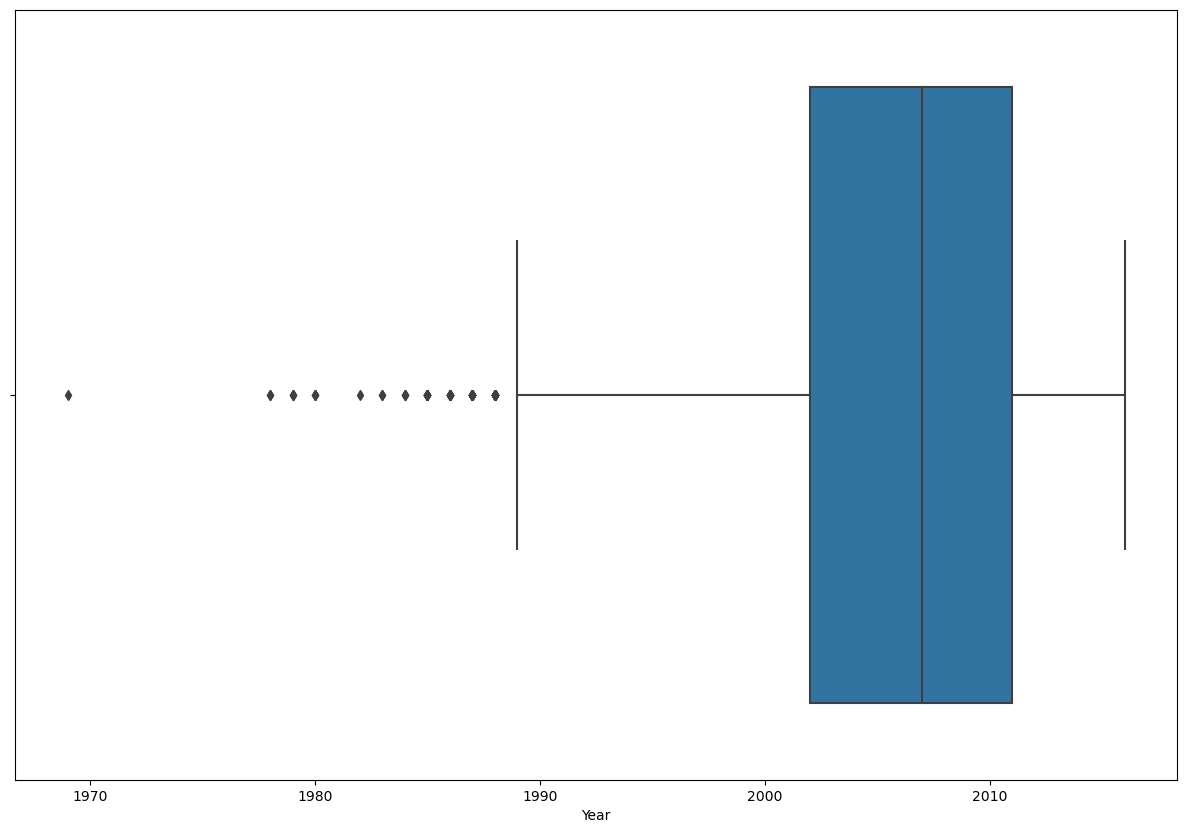

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(x=new_df.Year)

In [35]:
new_df.Year.describe()

count    3670.000000
mean     2005.639237
std         6.519617
min      1969.000000
25%      2002.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year, dtype: float64

In [36]:
new_df[new_df.Year == '2016']

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


In [37]:
new_df.Year.max()

2016

In [38]:
df1 = new_df[new_df.Year>=1990]

<AxesSubplot:xlabel='Year'>

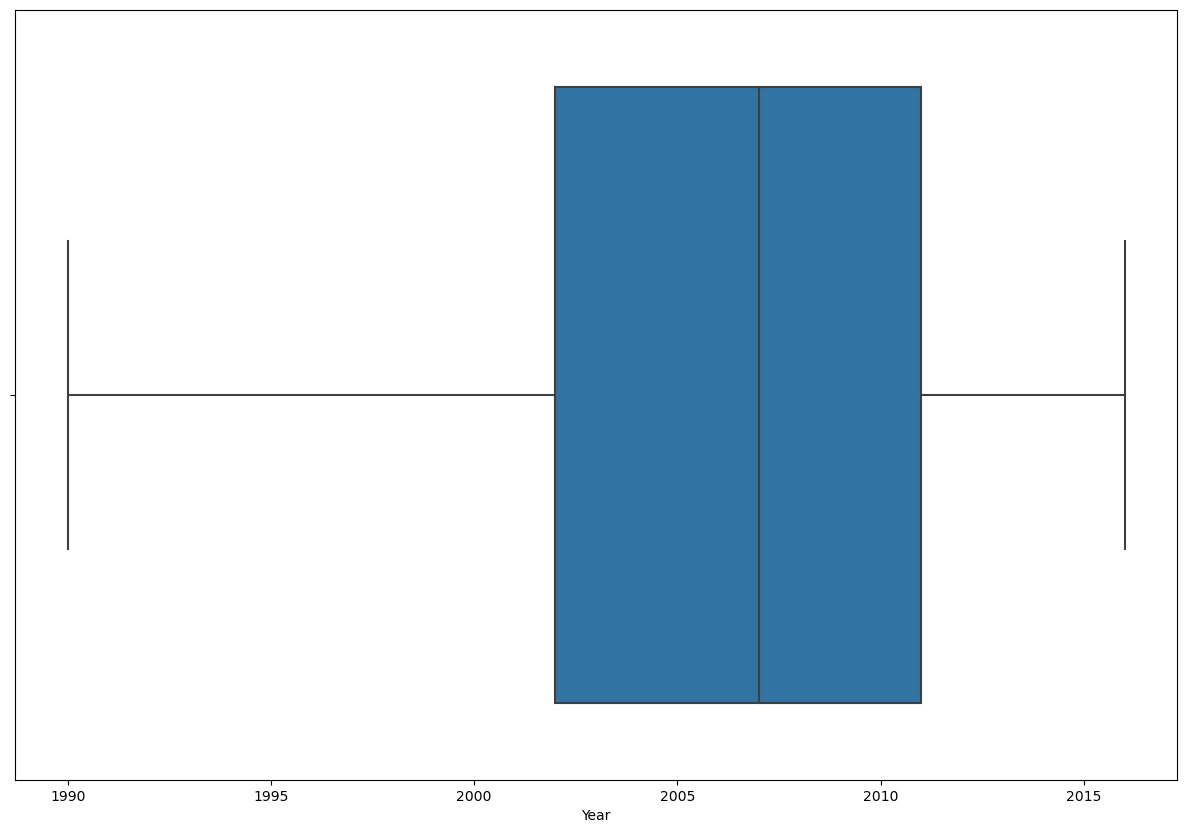

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df1.Year)

In [40]:
df1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [41]:
df1.Mileage.describe()

count    3569.000000
mean      173.634071
std        95.472630
min         0.000000
25%       108.000000
50%       167.000000
75%       234.000000
max       800.000000
Name: Mileage, dtype: float64

<AxesSubplot:xlabel='Mileage'>

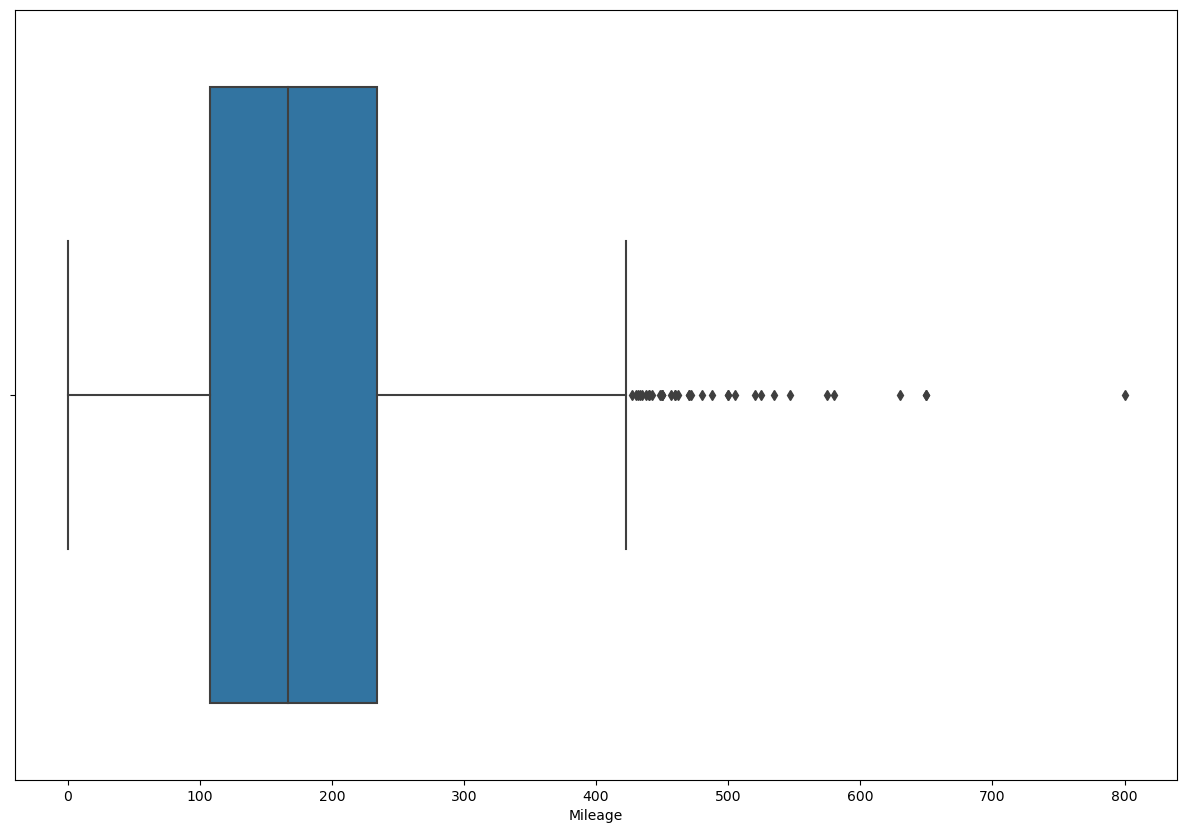

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df1.Mileage)

In [43]:
df2 = df1[df1.Mileage<=400]

<AxesSubplot:xlabel='Mileage'>

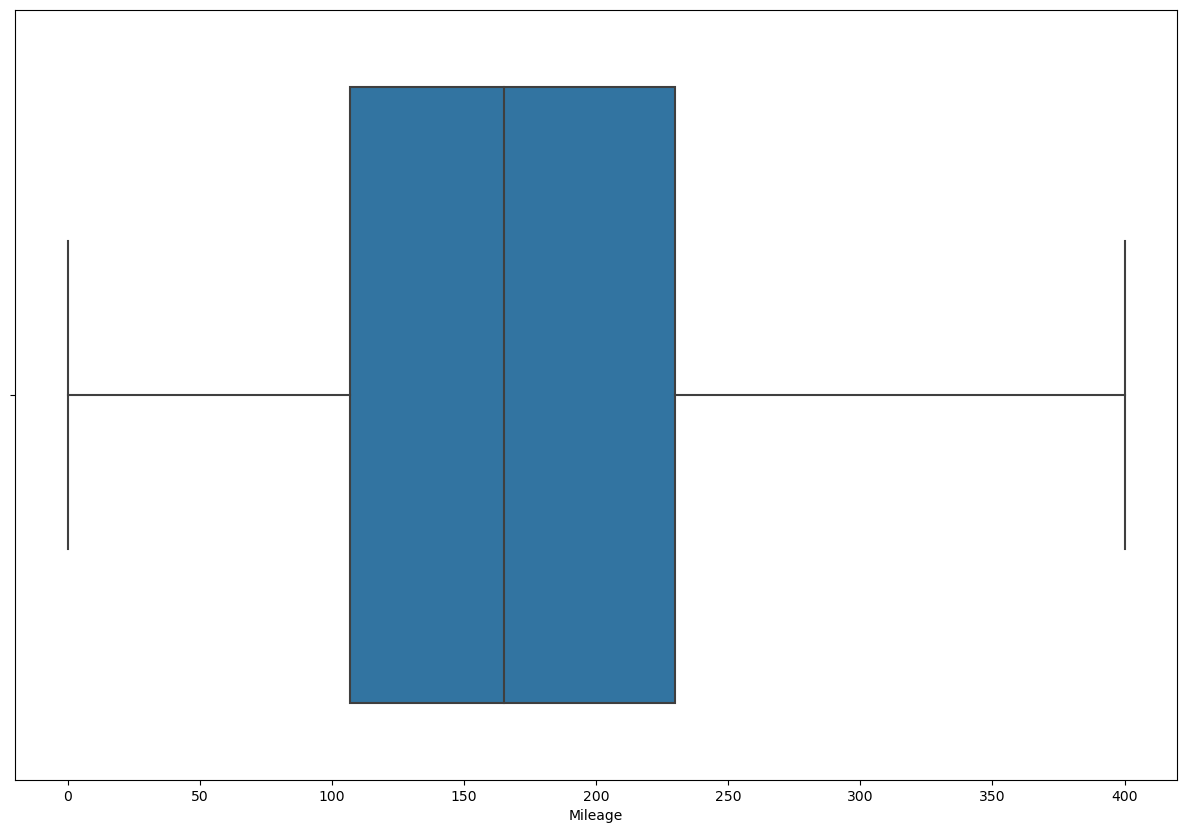

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df2.Mileage)

<AxesSubplot:xlabel='EngineV'>

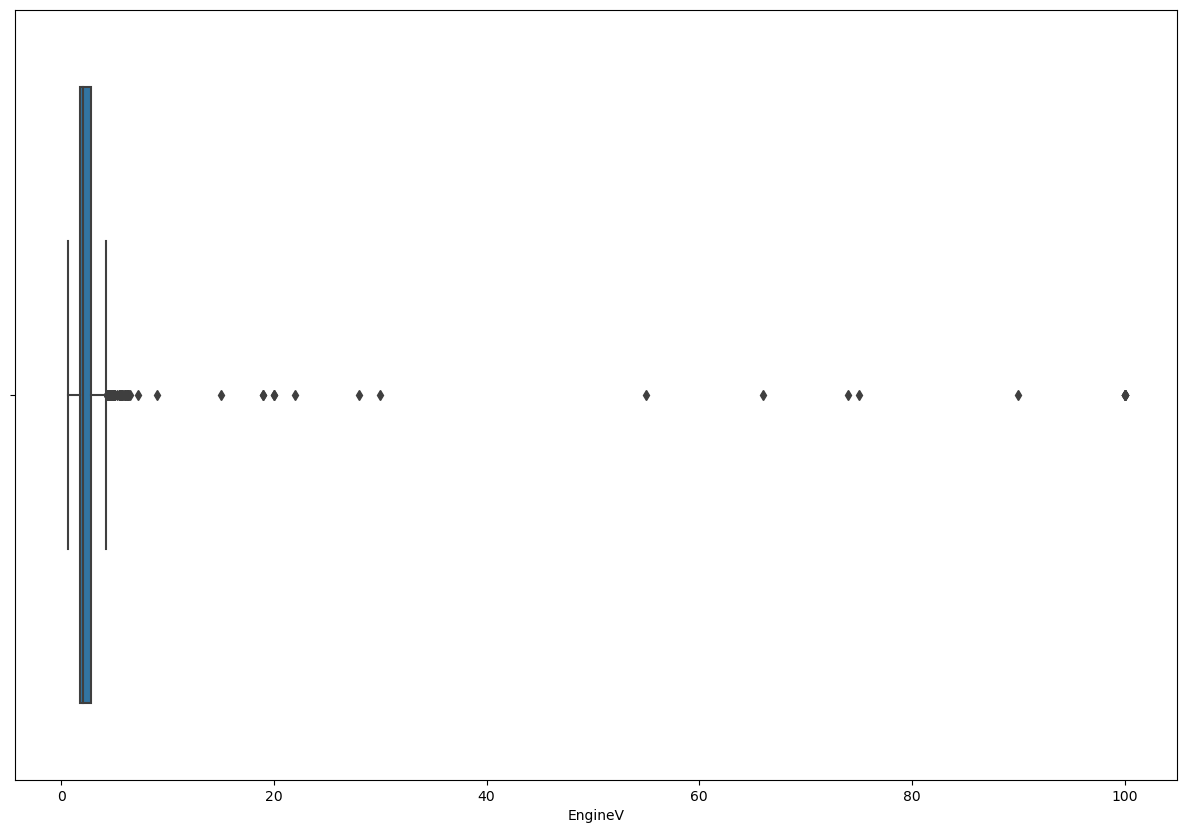

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df2.EngineV)

In [46]:
df2.EngineV.describe()

count    3520.000000
mean        2.692793
std         4.995165
min         0.600000
25%         1.800000
50%         2.000000
75%         2.800000
max        99.990000
Name: EngineV, dtype: float64

In [47]:
df3 = df2[df2.EngineV<=2.8]

<AxesSubplot:xlabel='EngineV'>

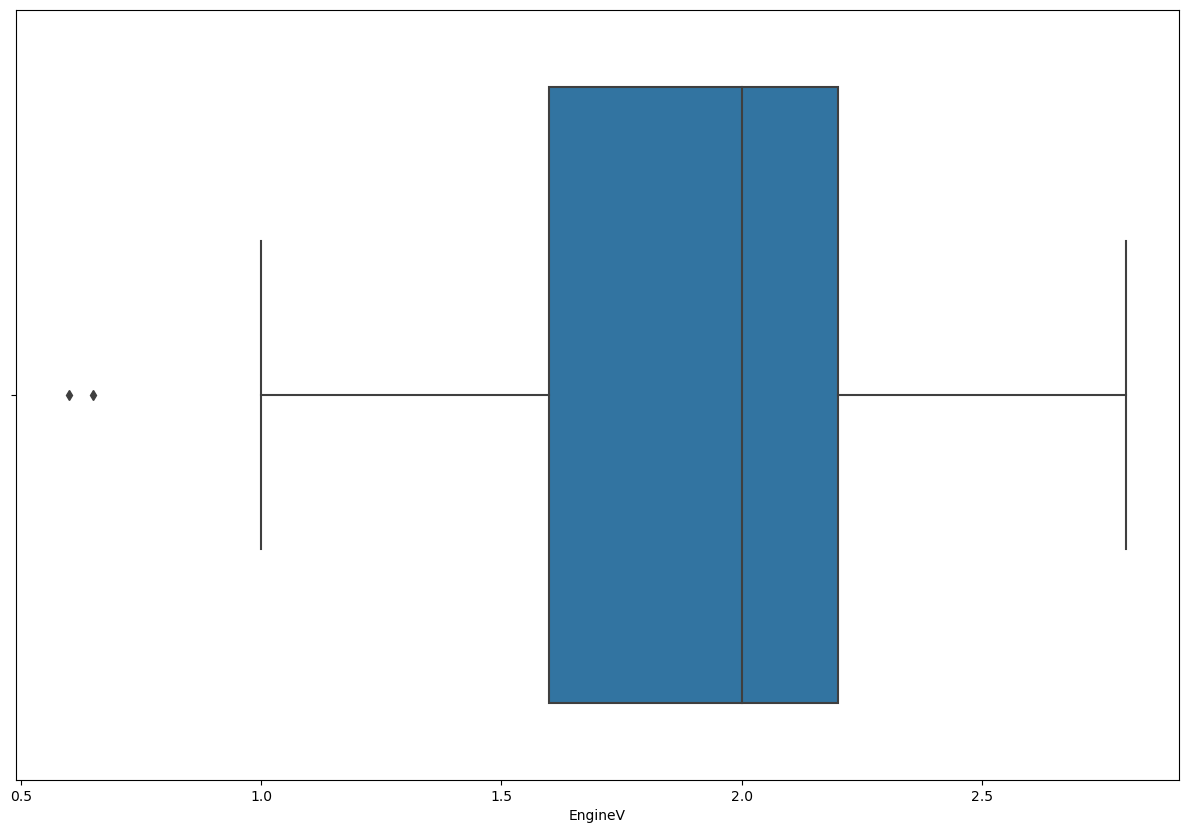

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df3.EngineV)

In [49]:
df4 = df3[df3.EngineV>1.0]

<AxesSubplot:xlabel='EngineV'>

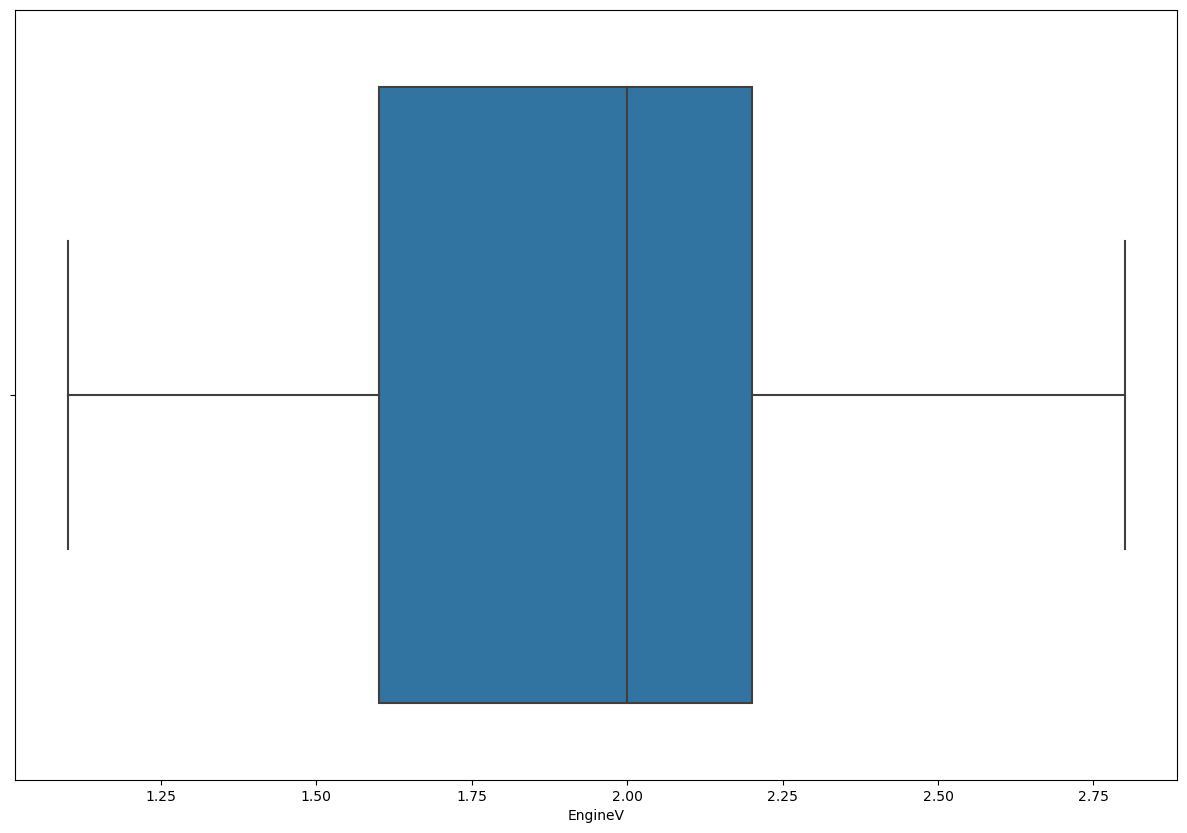

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df4.EngineV)

In [51]:
df4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999


In [52]:
df4.shape

(2635, 8)

In [53]:
df4.Brand.unique()

array(['BMW', 'Toyota', 'Audi', 'Renault', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

In [54]:
df5 = pd.get_dummies(data=df4,columns=['Brand','Body','Engine Type','Registration'])

In [55]:
df5.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,14200.0,200,2.7,2006,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,10799.0,193,1.5,2012,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
9,1400.0,212,1.8,1999,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [56]:
df5.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

In [57]:
X = df5.drop('Price',axis=1)
y = df5.Price

In [58]:
X.head()

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,1991,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
7,200,2.7,2006,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,193,1.5,2012,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
9,212,1.8,1999,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [59]:
X.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

In [60]:
y.head()

0     4200.0
4    18300.0
7    14200.0
8    10799.0
9     1400.0
Name: Price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=15)

In [63]:
X_train.shape

(2108, 22)

In [64]:
X_test.shape

(527, 22)

In [65]:
df5.shape

(2635, 23)

In [66]:
2108+527

2635

In [67]:
y_test.shape

(527,)

In [68]:
y_train.shape

(2108,)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
model.score(X_test,y_test)

0.7100758221697643

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
DTR = DecisionTreeRegressor(random_state=15)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=15)

In [74]:
DTR.score(X_test,y_test)

0.7515944789923831

In [75]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor(random_state=15)
ran_for.fit(X_train,y_train)

RandomForestRegressor(random_state=15)

In [76]:
ran_for.score(X_test,y_test)

0.8569414569648264

In [77]:
X_test.head()

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
3263,103,2.0,2007,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3910,30,2.5,2014,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
321,240,1.8,2002,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1411,185,1.5,2011,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1348,200,2.4,2002,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [78]:
y_test.head(10)

3263    18200.0
3910    24900.0
321      7500.0
1411    10500.0
1348     2600.0
2401     2150.0
2197     8400.0
2046    11800.0
3267    25500.0
4085    12300.0
Name: Price, dtype: float64

In [79]:
predicted_price = ran_for.predict(X_test)
predicted_price[:10]

array([12998.49, 19340.  ,  7496.47, 10520.  ,  5005.48,  2461.43,
        8338.62, 12025.96, 25632.  ,  8957.5 ])